ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

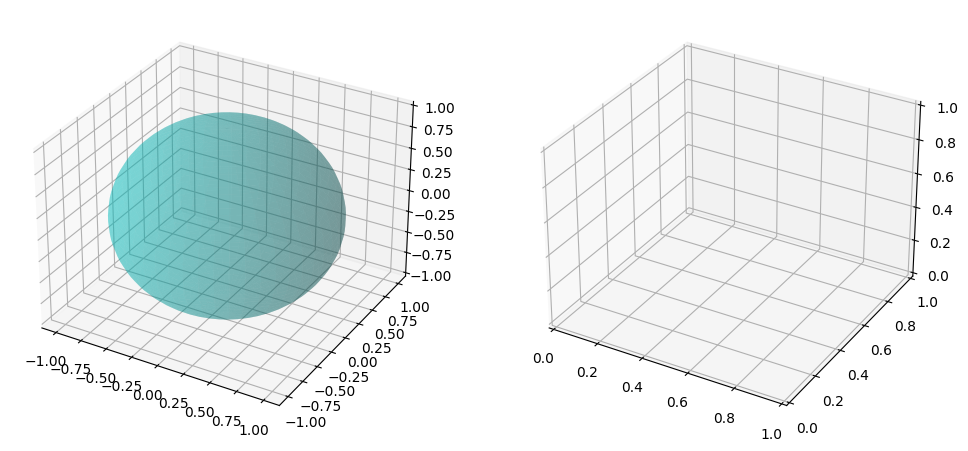

In [3]:
#a 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])


def stereographic_projection(x, y, z):
    denom = 1 - z
    denom[denom == 0] = np.nan  # Avoid division by zero
    return np.vstack((x / denom, y / denom))




def generate_sphere_mesh(n=50):
    theta = np.linspace(0, np.pi, n)
    phi = np.linspace(0, 2 * np.pi, n)
    theta, phi = np.meshgrid(theta, phi)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return x, y, z

def plot_sphere_and_projection():
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})
    ax1, ax2 = axes
    
    #sphere mesh
    x, y, z = generate_sphere_mesh()
    
    #plot sphere
    ax1.plot_surface(x, y, z, color='c', alpha=0.3)
    
    #plot curves on sphere
    phi_vals = np.linspace(0, 2*np.pi, 100)
    theta1 = np.pi / 4
    theta2 = np.pi / 2
    curve1 = spherical_to_cartesian(1, theta1, phi_vals)
    curve2 = spherical_to_cartesian(1, theta2, phi_vals)
    ax1.plot(curve1[0], curve1[1], curve1[2], 'r', label='Curve 1')
    ax1.plot(curve2[0], curve2[1], curve2[2], 'b', label='Curve 2')
    ax1.legend()
    ax1.set_title('Unit Sphere with Curves')
    
    #stereographic projection
    proj_curve1 = stereographic_projection(curve1[0], curve1[1], curve1[2])
    proj_curve2 = stereographic_projection(curve2[0], curve2[1], curve2[2])
    
    # plot projected curves
    ax2.plot(proj_curve1[0], proj_curve1[1], 'r', label='Projected Curve 1')
    ax2.plot(proj_curve2[0], proj_curve2[1], 'b', label='Projected Curve 2')
    ax2.legend()
    ax2.set_title('Stereographic Projection')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    
    plt.show()

#plot stereographic projection and check angle preservation
plot_sphere_and_projection()
